In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## 1. Load data

In [2]:
data = pd.read_csv("OnlineRetail.csv")
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmountSpent
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60


In [3]:
pd.set_option('display.max_columns', None) 

def data_overview(df, head=5):
    print("-" * 50)
    print(" SHAPE OF DATASET ".center(50, '-'))
    print('Rows: {}'.format(df.shape[0]))
    print('Columns: {}'.format(df.shape[1]))
    print("-" * 50)
    print(" HEAD ".center(50, '-'))
    print(df.head(head))
    print("-" * 50)
    print("DATA TYPES".center(50, '-'))
    print(df.dtypes.value_counts())
    print("-" * 50)
    print(" MISSING VALUES ".center(50, '-'))
    print(df.isnull().sum()[df.isnull().sum() > 0].sort_values(ascending=False))
    print("-" * 50)
    print(" DUPLICATED VALUES ".center(50, '-'))
    print(df.duplicated().sum())
    print("-" * 50)
    print(" STATISTICS OF DATA ".center(50, '-'))
    print(df.describe(include="all"))
    print("-" * 50)
    print("DATA INFO".center(50, '-'))
    print(df.info())

data_overview(data)


--------------------------------------------------
---------------- SHAPE OF DATASET ----------------
Rows: 541909
Columns: 9
--------------------------------------------------
---------------------- HEAD ----------------------
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

           InvoiceDate  UnitPrice  CustomerID         Country  \
0  2010-12-01 08:26:00       2.55     17850.0  United Kingdom   
1  2010-12-01 08:26:00       3.39     17850.0  United Kingdom   
2  2010-12-01 08:26:00       2.75     17850.0  United Kingdom   
3  2010-12-01 08:26:00       3.39     17850.0  United Kingdom   
4  2010-12-01 

## Dataset Overview

The dataset consists of **1,067,371** rows and **8** columns. These columns encompass **5 string-type**, **1 integer-type**, and **2 float-type** data. Notably, there are missing values present in the '**Customer ID**' column (**243,007** instances) and the '**Description**' column (**4,382** instances).

Transactions marked with a prefix '**c**' indicate canceled transactions and require appropriate handling during the data cleaning process. Additionally, the dataset contains **duplicated entries**.

It is crucial to identify and address **negative values** and **outliers** in the '**Quantity**' and '**Price**' columns to ensure data accuracy and reliability.
ty.
y.



## 2. Data Cleaning

#### 2.1 Handle Missing Values

In [4]:
print("Shape of data before removing NaN's in CustomerID:", data.shape)
data.dropna(subset=["CustomerID"], axis=0, inplace=True)
print("Shape of data after removing NaN's in CustomerID:", data.shape)


Shape of data before removing NaN's in CustomerID: (541909, 9)
Shape of data after removing NaN's in CustomerID: (406829, 9)


#### 2.2 Check

In [5]:
print(data.isnull().sum())

InvoiceNo           0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID          0
Country             0
TotalAmountSpent    0
dtype: int64


#### 2.3 Remove cancelled products by removing the InvoiceNo rows starting with 'c'

In [6]:
data = data[~data['InvoiceNo'].str.startswith('c')]
print("InvoiceNo rows starting with 'c' are removed")

InvoiceNo rows starting with 'c' are removed


#### 2.4 Remove Duplicates

In [7]:
print("Number of duplicates before cleaning:",data.duplicated().sum())
data = data.drop_duplicates(keep="first")
print("Number of duplicates after cleaning:",data.duplicated().sum())

Number of duplicates before cleaning: 5225
Number of duplicates after cleaning: 0


#### 2.5 Check for negative values

In [8]:
print("Negative value in Quantity is:",(data.Quantity<0).sum())
print("Negative value in Price is:",(data.UnitPrice<0).sum())

Negative value in Quantity is: 8872
Negative value in Price is: 0


#### 2.6 Handle the outliers

In [9]:
def outlier_thresholds(dataframe, variable):
    quartile1 = dataframe[variable].quantile(0.01)
    quartile3 = dataframe[variable].quantile(0.99)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return up_limit, low_limit

def replace_with_threshold(dataframe, variable):
    up_limit, low_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

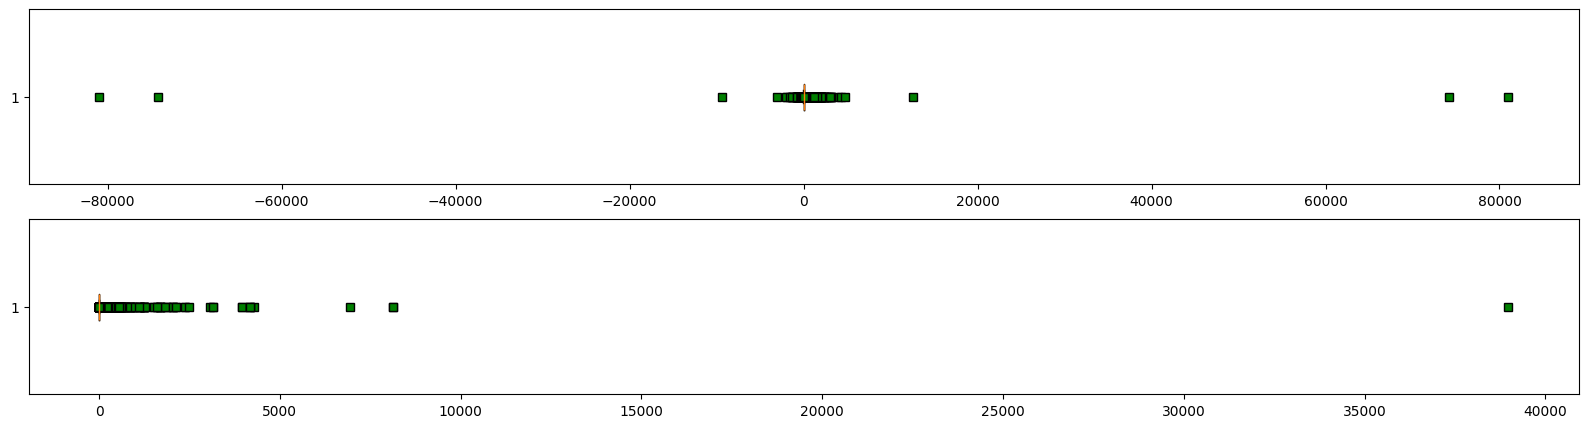

In [10]:
f, ax = plt.subplots(2,1, figsize = (20,5))
col_list = ["Quantity","UnitPrice"]
for i in range(0,2):
    ax[i].boxplot(data[col_list[i]],flierprops = dict(marker = "s", markerfacecolor = "green"), vert = 0)
plt.show()

In [11]:
replace_with_threshold(data, "Quantity")
replace_with_threshold(data, "UnitPrice")

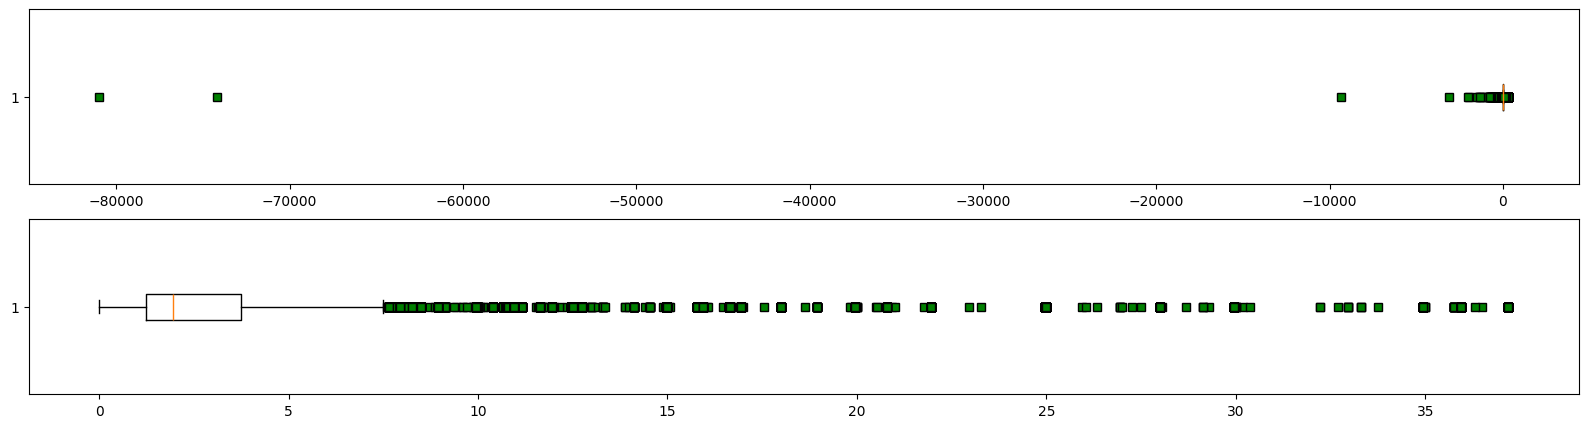

In [12]:
f, ax = plt.subplots(2,1, figsize = (20,5))
for i in range(0,2):
    ax[i].boxplot(data[col_list[i]],flierprops = dict(marker = "s", markerfacecolor = "green"), vert = 0)
plt.show()

## feature manipulation

In [13]:
data["Revenue"] = data["Quantity"] * data["UnitPrice"]

In [14]:
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

In [15]:
print("Max date :",data["InvoiceDate"].max())
print("Min date :",data["InvoiceDate"].min())

Max date : 2011-12-09 12:50:00
Min date : 2010-12-01 08:26:00


## 3. Statistics

In [16]:
import datetime as dt
#Set Latest date 2011-12-10 as last invoice date was 2011-12-09.
Latest_Date = dt.datetime(2011,12,10)

RFM = data.groupby('CustomerID').agg({'InvoiceDate': lambda x: (Latest_Date - x.max()).days, 
                                                 'InvoiceNo': lambda x: x.nunique(), 
                                                 "Revenue": lambda x: x.sum()})
                                
RFM['InvoiceDate'] = RFM['InvoiceDate'].astype(int)

RFM.rename(columns={'InvoiceDate': 'Recency', 
                         'InvoiceNo': 'Frequency', 
                         'Revenue': 'Monetary'}, inplace=True)

RFM.reset_index().head().style.set_properties(**{"background-color": "#ffffff","color": "black", "border-color": "black"})

,CustomerID,Recency,Frequency,Monetary
0,12346.000000,325,2,-76868.480000
1,12347.000000,2,7,4310.000000
2,12348.000000,75,4,1771.905000
3,12349.000000,18,1,1491.970000
4,12350.000000,310,1,331.585000


In [17]:
RFM = RFM[(RFM["Frequency"]>1)]
RFM.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,325,2,-76868.480
12347.0,2,7,4310.000
12348.0,75,4,1771.905
12352.0,36,11,1525.705
12356.0,22,3,2811.430


In [18]:
Shopping_Cycle = data.groupby('CustomerID').agg({'InvoiceDate': lambda x: ((x.max() - x.min()).days)})

In [19]:
RFM["Shopping_Cycle"] = Shopping_Cycle
RFM.head()

,Recency,Frequency,Monetary,Shopping_Cycle
CustomerID,,,,
12346.0,325,2,-76868.480,0
12347.0,2,7,4310.000,365
12348.0,75,4,1771.905,282
12352.0,36,11,1525.705,260
12356.0,22,3,2811.430,302


In [20]:
RFM["Interpurchase_Time"] = RFM["Shopping_Cycle"] // RFM["Frequency"]
RFMT = RFM[["Recency","Frequency","Monetary","Interpurchase_Time"]]
RFMT.head()

,Recency,Frequency,Monetary,Interpurchase_Time
CustomerID,,,,
12346.0,325,2,-76868.480,0
12347.0,2,7,4310.000,52
12348.0,75,4,1771.905,70
12352.0,36,11,1525.705,23
12356.0,22,3,2811.430,100


## 4. Customer Segmentation

In [21]:
!pip install yellowbrick



[notice] A new release of pip is available: 23.2.1 -> 23.3
[notice] To update, run: python.exe -m pip install --upgrade pip


C:\Users\Smit\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Smit\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Smit\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Smit\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\

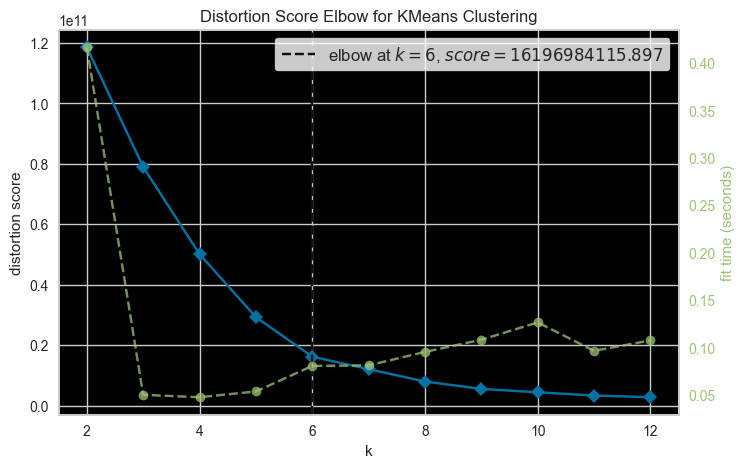

Therefore K = 4


In [22]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
plt.figure(figsize=(8,5))
ax = plt.axes()
ax.set_facecolor("#000000")
Elbow_M = KElbowVisualizer(KMeans(), k=12) 
Elbow_M.fit(RFMT)
Elbow_M.show()
print("Therefore K = 4")

In [23]:
#Fitting KMeans Model
kmeans = KMeans(n_clusters=4,max_iter=50)
kmeans.fit(RFMT)

C:\Users\Smit\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(max_iter=50, n_clusters=4)

In [24]:
RFMT["Clusters"]=kmeans.labels_
RFMT.head()

,Recency,Frequency,Monetary,Interpurchase_Time,Clusters
CustomerID,,,,,
12346.0,325,2,-76868.480,0,3
12347.0,2,7,4310.000,52,0
12348.0,75,4,1771.905,70,0
12352.0,36,11,1525.705,23,0
12356.0,22,3,2811.430,100,0


In [25]:
kmeans.cluster_centers_

array([[ 6.39702479e+01,  6.20363636e+00,  1.80919595e+03,
         3.97685950e+01],
       [ 7.16666667e+00,  8.90000000e+01,  1.64839268e+05,
         5.50000000e+00],
       [ 6.26923077e+00,  6.04615385e+01,  4.11886142e+04,
         8.46153846e+00],
       [ 1.62500000e+02,  2.50000000e+00, -1.22352470e+05,
         3.40000000e+01]])

## 5. Visualisation

<function matplotlib.pyplot.show(close=None, block=None)>

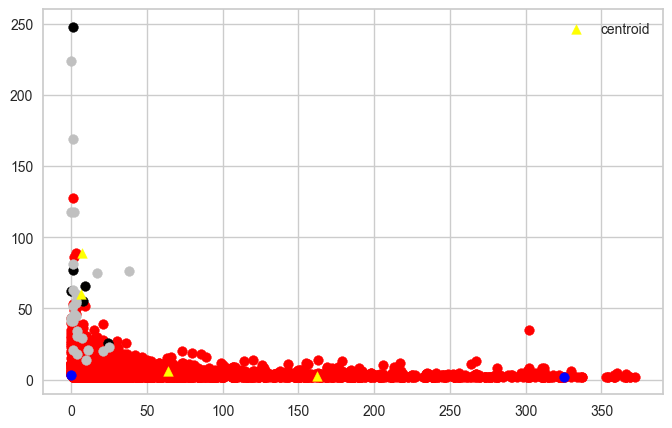

In [26]:
one = RFMT[RFMT["Clusters"]==0]
two = RFMT[RFMT["Clusters"]==1]
three = RFMT[RFMT["Clusters"]==2]
four = RFMT[RFMT["Clusters"]==3]

plt.figure(figsize=(8,5))
ax = plt.axes()
ax.set_facecolor("#ffffff")
plt.scatter(one["Recency"],one["Frequency"],color='red')
plt.scatter(two["Recency"],two["Frequency"],color='black')
plt.scatter(three["Recency"],three["Frequency"],color='silver')
plt.scatter(four["Recency"],four["Frequency"],color='blue')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color="yellow",marker="^",label="centroid")
plt.legend()
plt.show 

In [27]:
from sklearn.metrics import silhouette_score
print("Silhouette score :",silhouette_score(RFMT, kmeans.labels_, metric='euclidean'))


Silhouette score : 0.9398352511828644


## 6. Customer Insights

In [28]:
cluster_summary = RFMT.groupby('Clusters').agg({'Recency': 'mean', 'Frequency': 'mean', 'Monetary': 'mean', 'Interpurchase_Time': 'mean'})
cluster_summary['Count'] = RFMT['Clusters'].value_counts()
cluster_summary = cluster_summary.reset_index()

for i in range(len(cluster_summary)):
    for j in range(i+1, len(cluster_summary)):
        print(f"Comparison between Cluster {cluster_summary['Clusters'][i]} and Cluster {cluster_summary['Clusters'][j]}")
        print(f"Recency: {cluster_summary['Recency'][i]} vs {cluster_summary['Recency'][j]}")
        print(f"Frequency: {cluster_summary['Frequency'][i]} vs {cluster_summary['Frequency'][j]}")
        print(f"Monetary: {cluster_summary['Monetary'][i]} vs {cluster_summary['Monetary'][j]}")
        print(f"Interpurchase Time: {cluster_summary['Interpurchase_Time'][i]} vs {cluster_summary['Interpurchase_Time'][j]}")
        print("\n")

for i in range(len(cluster_summary)):
    if cluster_summary['Clusters'][i] == 0:
        print("Marketing strategy for Cluster 0: Targeted promotions and discounts to encourage repeat purchases and increase frequency of purchases.")
    elif cluster_summary['Clusters'][i] == 1:
        print("Marketing strategy for Cluster 1: Personalized recommendations and upselling to increase the monetary value of purchases.")
    elif cluster_summary['Clusters'][i] == 2:
        print("Marketing strategy for Cluster 2: Targeted promotions and discounts to encourage repeat purchases and increase frequency of purchases.")
    elif cluster_summary['Clusters'][i] == 3:
        print("Marketing strategy for Cluster 3: Personalized recommendations and upselling to increase the monetary value of purchases.")


Comparison between Cluster 0 and Cluster 1
Recency: 63.970247933884295 vs 7.166666666666667
Frequency: 6.203636363636364 vs 89.0
Monetary: 1809.195954710744 vs 164839.26833333334
Interpurchase Time: 39.768595041322314 vs 5.5


Comparison between Cluster 0 and Cluster 2
Recency: 63.970247933884295 vs 6.269230769230769
Frequency: 6.203636363636364 vs 60.46153846153846
Monetary: 1809.195954710744 vs 41188.61423076923
Interpurchase Time: 39.768595041322314 vs 8.461538461538462


Comparison between Cluster 0 and Cluster 3
Recency: 63.970247933884295 vs 162.5
Frequency: 6.203636363636364 vs 2.5
Monetary: 1809.195954710744 vs -122352.47
Interpurchase Time: 39.768595041322314 vs 34.0


Comparison between Cluster 1 and Cluster 2
Recency: 7.166666666666667 vs 6.269230769230769
Frequency: 89.0 vs 60.46153846153846
Monetary: 164839.26833333334 vs 41188.61423076923
Interpurchase Time: 5.5 vs 8.461538461538462


Comparison between Cluster 1 and Cluster 3
Recency: 7.166666666666667 vs 162.5
Frequency

## 7. Customer Engagement Recommendations

In [29]:
cluster_summary = RFMT.groupby('Clusters').agg({'Recency': 'mean', 'Frequency': 'mean', 'Monetary': 'mean', 'Interpurchase_Time': 'mean'})
cluster_summary['Count'] = RFMT['Clusters'].value_counts()
cluster_summary = cluster_summary.reset_index()

for i in range(len(cluster_summary)):
    if cluster_summary['Clusters'][i] == 0:
        print("Marketing strategy for Cluster 0: Targeted promotions and discounts to encourage repeat purchases and increase frequency of purchases.")
    elif cluster_summary['Clusters'][i] == 1:
        print("Marketing strategy for Cluster 1: Personalized recommendations and upselling to increase the monetary value of purchases.")
    elif cluster_summary['Clusters'][i] == 2:
        print("Marketing strategy for Cluster 2: Targeted promotions and discounts to encourage repeat purchases and increase frequency of purchases.")
    elif cluster_summary['Clusters'][i] == 3:
        print("Marketing strategy for Cluster 3: Personalized recommendations and upselling to increase the monetary value of purchases.")


Marketing strategy for Cluster 0: Targeted promotions and discounts to encourage repeat purchases and increase frequency of purchases.
Marketing strategy for Cluster 1: Personalized recommendations and upselling to increase the monetary value of purchases.
Marketing strategy for Cluster 2: Targeted promotions and discounts to encourage repeat purchases and increase frequency of purchases.
Marketing strategy for Cluster 3: Personalized recommendations and upselling to increase the monetary value of purchases.
